In [1]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv('book1.csv')

# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [2]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [3]:
# Iterating through the DataFrame to add edges
for i, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [4]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


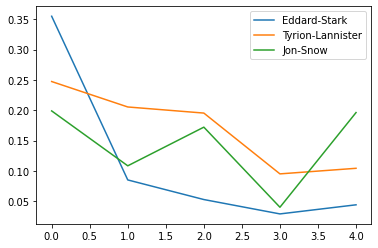

In [5]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot();

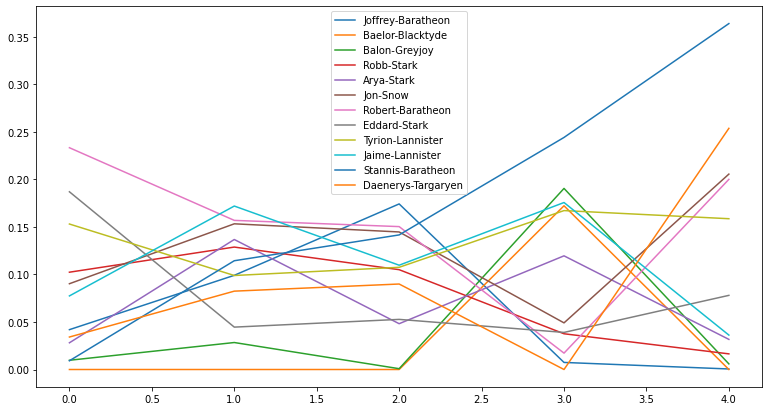

In [6]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7));

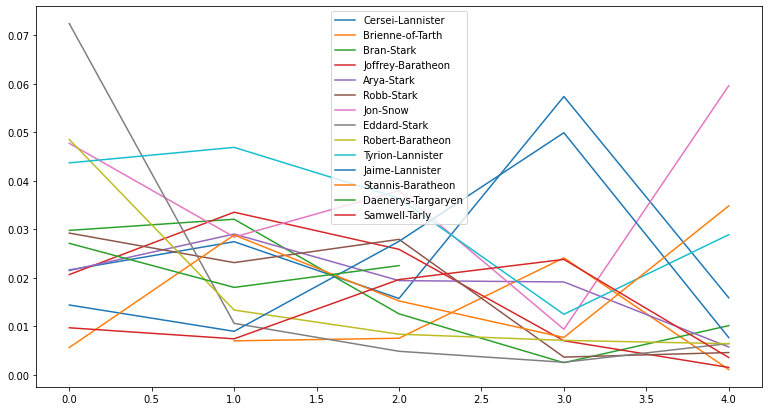

In [7]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book, weight='weight') for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7));

In [8]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.corr().T

,Aegon-I-Targaryen,Daenerys-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,Franklyn-Flowers,Haldon,Harry-Strickland,Jon-Connington,Lemore,Rhaegar-Targaryen,...,Tysha,Shrouded-Lord,Theomore,William-Foxglove,Walder-Frey-(son-of-Jammos),Wex-Pyke,Willow-Witch-eye,Thistle,Wylis-Manderly,Wulfe
Aegon-I-Targaryen,1.000000,-0.018377,0.278893,0.675768,0.647014,0.918495,0.999852,0.836828,0.995226,0.753194,...,0.312087,0.999997,-0.578654,1.000000,0.997255,1.000000,0.999742,0.923316,0.999994,0.999190
Daenerys-Targaryen,-0.018377,1.000000,0.955035,0.724571,0.750459,0.378486,-0.035547,0.531994,0.079287,0.643845,...,0.944158,-0.020834,0.826070,-0.019232,-0.092358,-0.018104,-0.041092,-0.400943,-0.021945,-0.058597
Aegon-Targaryen-(son-of-Rhaegar),0.278893,0.955035,1.000000,0.896334,0.912672,0.635904,0.262358,0.759128,0.371282,0.841758,...,0.999396,0.276532,0.621831,0.278072,0.207021,0.279155,0.256999,-0.111296,0.275465,0.240022
Elia-Martell,0.675768,0.724571,0.896334,1.000000,0.999265,0.912169,0.663009,0.969047,0.744480,0.993857,...,0.911196,0.673955,0.210135,0.675138,0.619335,0.675970,0.658844,0.340867,0.673134,0.645559
Franklyn-Flowers,0.647014,0.750459,0.912672,0.999265,1.000000,0.895787,0.633823,0.958870,0.718338,0.988884,...,0.926320,0.645138,0.247460,0.646362,0.588781,0.647222,0.629521,0.304576,0.644289,0.615806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wex-Pyke,1.000000,-0.018104,0.279155,0.675970,0.647222,0.918603,0.999848,0.836978,0.995253,0.753374,...,0.312347,0.999996,-0.578431,0.999999,0.997235,1.000000,0.999736,0.923211,0.999993,0.999179
Willow-Witch-eye,0.999742,-0.041092,0.256999,0.658844,0.629521,0.909273,0.999985,0.824172,0.992752,0.738053,...,0.290418,0.999795,-0.597037,0.999761,0.998680,0.999736,1.000000,0.931805,0.999817,0.999846
Thistle,0.923316,-0.400943,-0.111296,0.340867,0.304576,0.696200,0.929776,0.562409,0.881429,0.442816,...,-0.076704,0.924257,-0.847493,0.923644,0.949218,0.923211,0.931805,1.000000,0.924681,0.938023
Wylis-Manderly,0.999994,-0.021945,0.275465,0.673134,0.644289,0.917078,0.999907,0.834870,0.994872,0.750843,...,0.308695,0.999999,-0.581560,0.999996,0.997513,0.999993,0.999817,0.924681,1.000000,0.999327


In [9]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow
